## Imports

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import healpy as hp
from reproject import reproject_from_healpix
import cartopy.crs as ccrs


## Healpix Map

Max value: 119.88006591796875, pixel: 1561293
Max detection value: 119.88006591796875
Location: Latitude = 0.45°, Longitude = 126.12°


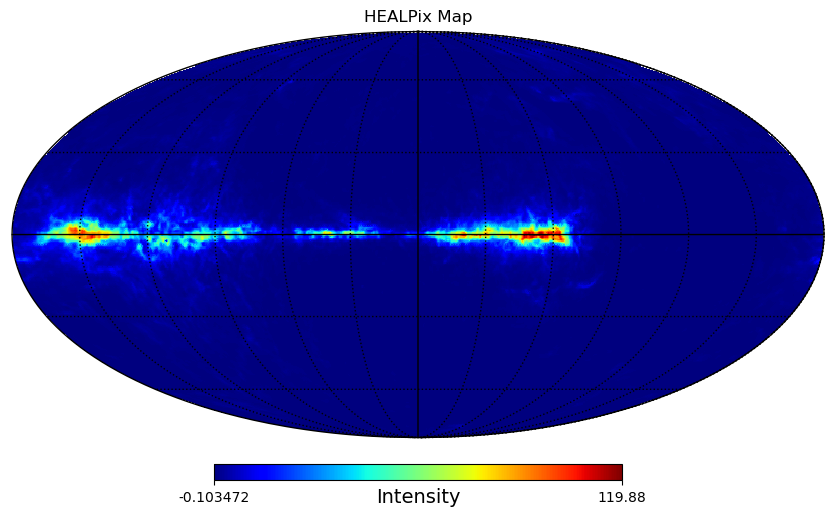

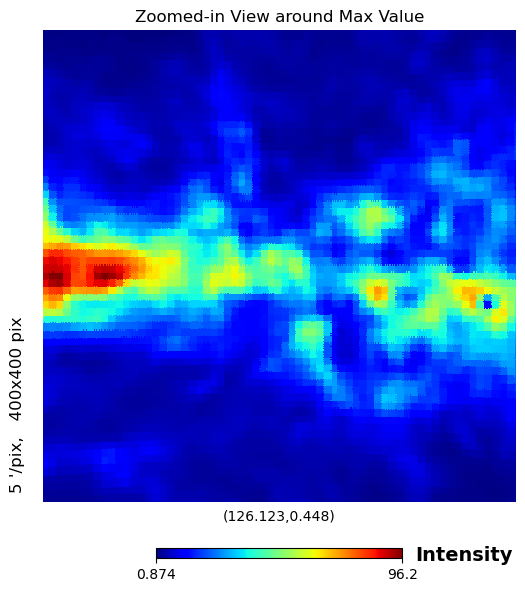

In [172]:
velocity = "cut-40"
filename = f"LAB_Healpix/LAB_{velocity}.fits"
hmap = hp.read_map(filename)
max_pix = np.argmax(hmap)
max_value = hmap[max_pix]
print(f"Max value: {max_value}, pixel: {max_pix}")

nside = hp.get_nside(hmap)
theta, phi = hp.pix2ang(nside, max_pix)
latitude = 90 - np.degrees(theta)  
longitude = np.degrees(phi) - 180  

print(f"Max detection value: {max_value}")
print(f"Location: Latitude = {latitude:.2f}°, Longitude = {longitude:.2f}°")

hp.mollview(hmap, title="HEALPix Map", cmap="jet", unit="Intensity")
hp.graticule()
plt.show()

hp.gnomview(
    hmap, 
    rot=(longitude, latitude),  
    reso=5.0,  
    xsize=400,  
    title="Zoomed-in View around Max Value",
    cmap="jet", 
    unit="Intensity"
)
plt.show()


## HI Column Density (Plate Carrée, Galactic)

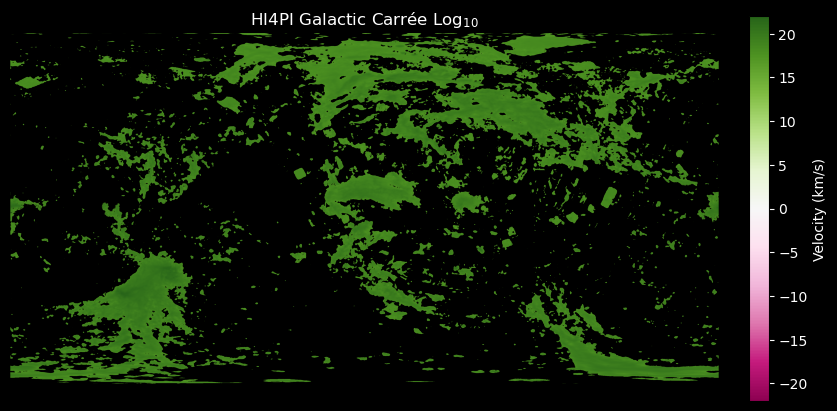

In [124]:
filename = "HI4PI_fits/hi4pi-hvc-nhi-gal-car.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data

if data is not None: 
    fig, ax = plt.subplots(figsize=(10, 5), facecolor="black")

    vmax = np.nanmax(np.abs(data))  
    vmin = -vmax  
    im = ax.imshow(data, origin="lower", cmap="PiYG", vmin=vmin, vmax=vmax)
    ax.axis("off")

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Velocity (km/s)", color="white")
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white")
    plt.title("HI4PI Galactic Carrée Log$_{10}$", fontsize=12, color="white")
    plt.show()


## H1 Column Density (Aitoff, Galactic)

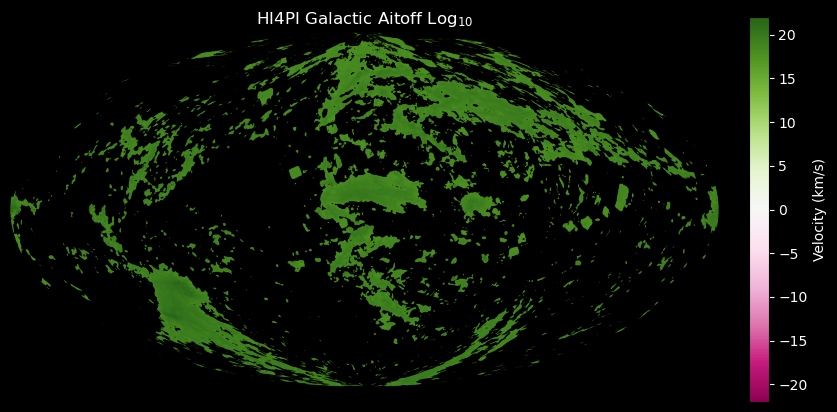

In [94]:
filename = "/Users/Djslime07/HVC_Project/HI4PI_fits/hi4pi-hvc-nhi-gal-ait.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data

if data is not None: 
    fig, ax = plt.subplots(figsize=(10, 5), facecolor="black")

    vmax = np.nanmax(np.abs(data))  
    vmin = -vmax  
    im = ax.imshow(data, origin="lower", cmap="PiYG", vmin=vmin, vmax=vmax)
    ax.axis("off")

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Velocity (km/s)", color="white")
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white")
    plt.title("HI4PI Galactic Aitoff Log$_{10}$", fontsize=12, color="white")
    plt.show()

## H1 Column Density (Plate Carrée, Magellanic)

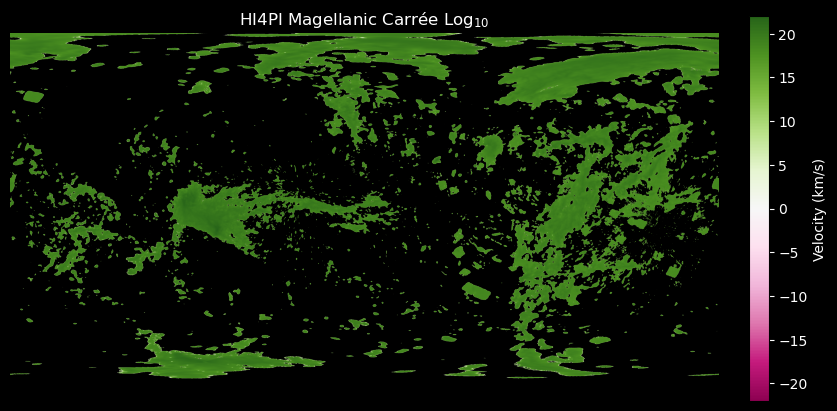

In [97]:
filename = "HI4PI_fits/hi4pi-hvc-nhi-mag-car.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data

if data is not None: 
    fig, ax = plt.subplots(figsize=(10, 5), facecolor="black")

    vmax = np.nanmax(np.abs(data))  
    vmin = -vmax  
    im = ax.imshow(data, origin="lower", cmap="PiYG", vmin=vmin, vmax=vmax)
    ax.axis("off")

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Velocity (km/s)", color="white")
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white")
    plt.title("HI4PI Magellanic Carrée Log$_{10}$", fontsize=12, color="white")
    plt.show()

## H1 Velocity in GSR (Aitoff, Galactic)

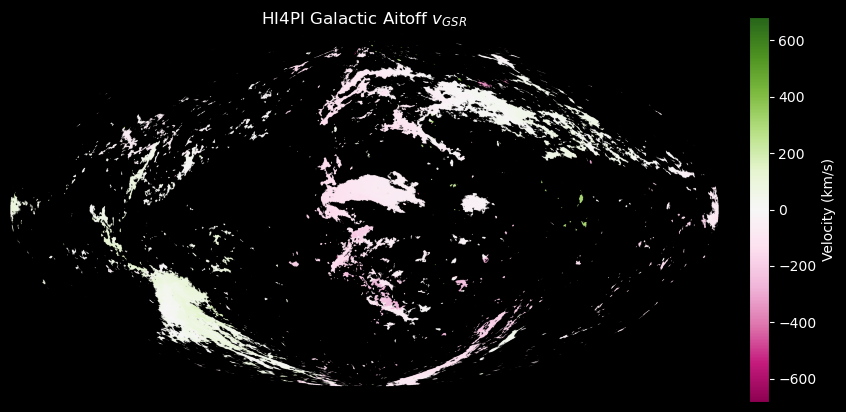

In [100]:
filename = "HI4PI_fits/hi4pi-hvc-vgsr-gal-ait.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data

if data is not None: 
    fig, ax = plt.subplots(figsize=(10, 5), facecolor="black")

    vmax = np.nanmax(np.abs(data))  
    vmin = -vmax  
    im = ax.imshow(data, origin="lower", cmap="PiYG", vmin=vmin, vmax=vmax)
    ax.axis("off")

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Velocity (km/s)", color="white")
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white")
    plt.title("HI4PI Galactic Aitoff $v_{GSR}$", fontsize=12, color="white")
    plt.show()

## H1 Velocity in GSR (Carrée, Galactic)

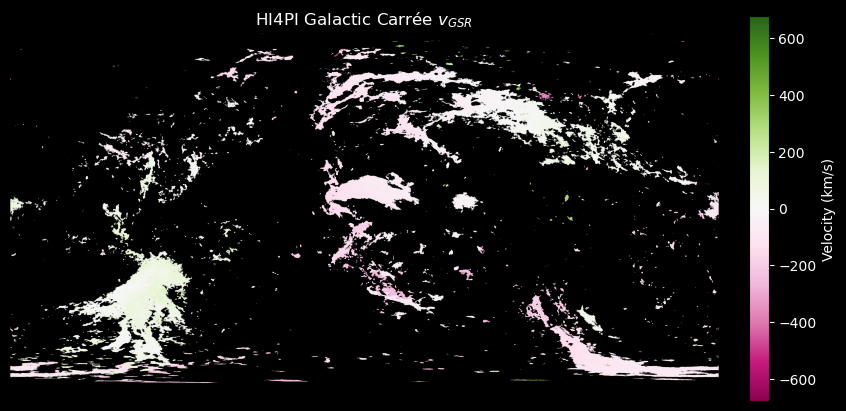

In [101]:
filename = "HI4PI_fits/hi4pi-hvc-vgsr-gal-car.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data

if data is not None: 
    fig, ax = plt.subplots(figsize=(10, 5), facecolor="black")

    vmax = np.nanmax(np.abs(data))  
    vmin = -vmax  
    im = ax.imshow(data, origin="lower", cmap="PiYG", vmin=vmin, vmax=vmax)
    ax.axis("off")

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Velocity (km/s)", color="white")
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white")
    plt.title("HI4PI Galactic Carrée $v_{GSR}$", fontsize=12, color="white")
    plt.show()

## H1 Velocity in GSR (Carrée, Magellanic)

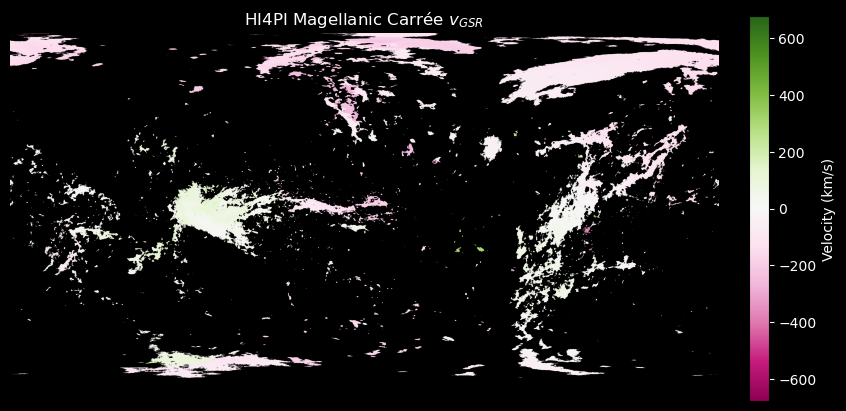

In [102]:
filename = "HI4PI_fits/hi4pi-hvc-vgsr-mag-car.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data

if data is not None: 
    fig, ax = plt.subplots(figsize=(10, 5), facecolor="black")

    vmax = np.nanmax(np.abs(data))  
    vmin = -vmax  
    im = ax.imshow(data, origin="lower", cmap="PiYG", vmin=vmin, vmax=vmax)
    ax.axis("off")

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Velocity (km/s)", color="white")
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white")
    plt.title("HI4PI Magellanic Carrée $v_{GSR}$", fontsize=12, color="white")
    plt.show()

## H1 Velocity in LSR (Aitoff, Galactic)

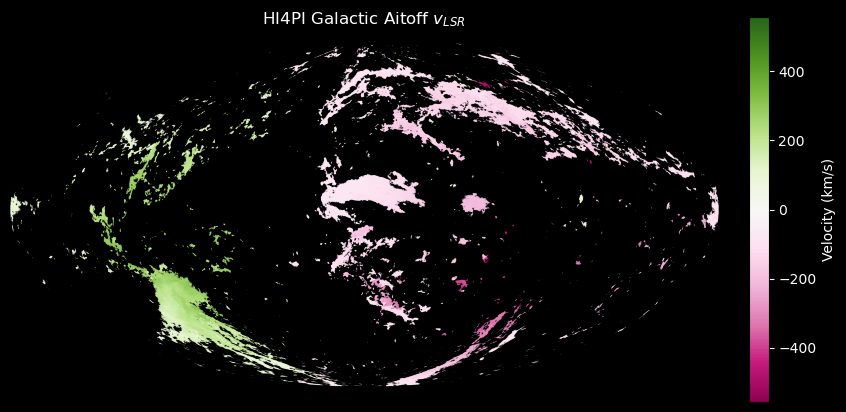

In [189]:
filename = "/Users/Djslime07/HVC_Project/HI4PI_fits/hi4pi-hvc-vlsr-gal-ait.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data

if data is not None: 
    fig, ax = plt.subplots(figsize=(10, 5), facecolor="black")

    vmax = np.nanmax(np.abs(data))  
    vmin = -vmax  
    im = ax.imshow(data, origin="lower", cmap="PiYG", vmin=vmin, vmax=vmax)
    ax.axis("off")

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Velocity (km/s)", color="white")
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white")
    plt.title("HI4PI Galactic Aitoff $v_{LSR}$", fontsize=12, color="white")
    plt.show()

## H1 Velocity in LSR (Carrée, Galactic)

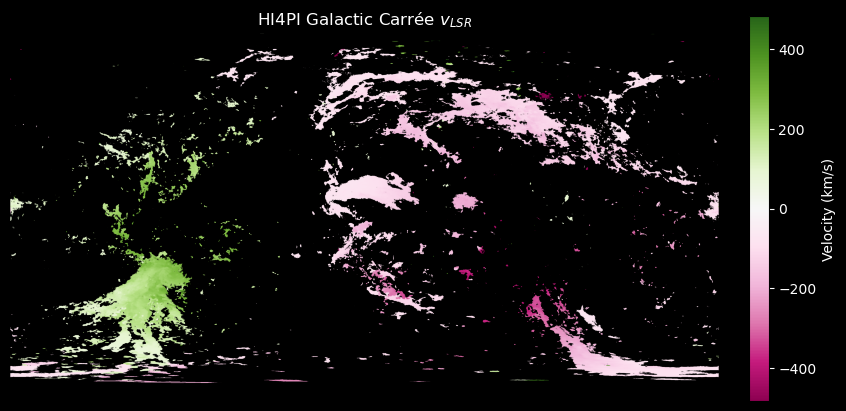

In [104]:
filename = "HI4PI_fits/hi4pi-hvc-vlsr-gal-car.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data

if data is not None: 
    fig, ax = plt.subplots(figsize=(10, 5), facecolor="black")

    vmax = np.nanmax(np.abs(data))  
    vmin = -vmax  
    im = ax.imshow(data, origin="lower", cmap="PiYG", vmin=vmin, vmax=vmax)
    ax.axis("off")

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Velocity (km/s)", color="white")
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white")
    plt.title("HI4PI Galactic Carrée $v_{LSR}$", fontsize=12, color="white")
    plt.show()

## :(

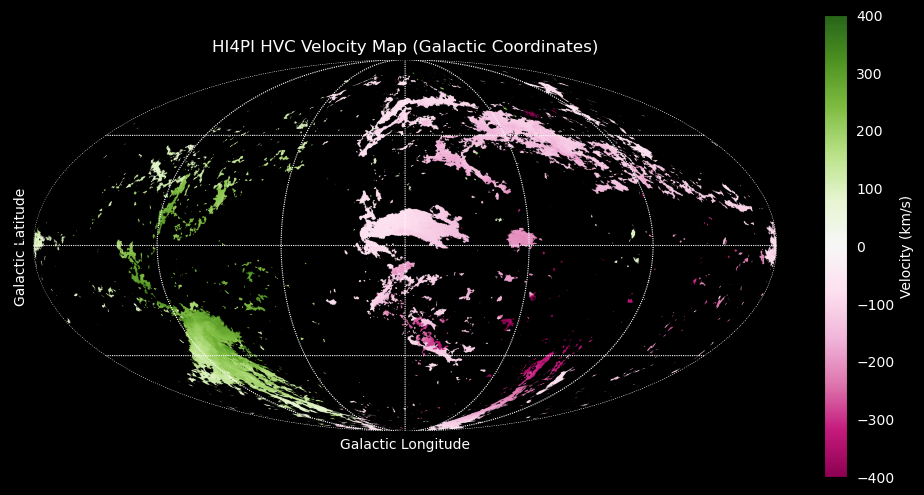

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from mpl_toolkits.basemap import Basemap

fits_file_path = "HI4PI_fits/hi4pi-hvc-vlsr-gal-ait.fits"
with fits.open(fits_file_path) as hdul:
    data = hdul[0].data  

data[data == -1] = np.nan

fig, ax = plt.subplots(figsize=(12, 6))

# Set up Basemap with the appropriate projection
m = Basemap(projection='moll', lon_0=0, lat_0=0, resolution='c', ax=ax)

# Convert the data array to the map projection
x, y = m(*np.meshgrid(np.linspace(-180, 180, data.shape[1]), np.linspace(-90, 90, data.shape[0])))

# Display the image with the new map
im = m.imshow(data, origin="lower", cmap="PiYG", vmin=-400, vmax=400)

cbar = plt.colorbar(im, ax=ax, label="Velocity (km/s)")
ax.set_title("HI4PI HVC Velocity Map (Galactic Coordinates)", color="white")

# Set grid lines and tick labels
glon_ticks = np.linspace(-180, 180, 7)
glat_ticks = np.linspace(-90, 90, 5)    

# Draw meridians and parallels (curved lines)
m.drawparallels(glat_ticks, labels=[True, True, True, False], color="white", linewidth=0.8)
m.drawmeridians(glon_ticks, labels=[False, False, False, True], color="white", linewidth=0.8)

# Set tick labels color to white
ax.set_xlabel("Galactic Longitude", color="white")
ax.set_ylabel("Galactic Latitude", color="white")

# Colorbar label in white
cbar.set_label("Velocity (km/s)", color="white")
cbar.ax.tick_params(labelcolor="white")

# Set the background color to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

plt.show()
